In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#%load_ext line_profiler
import ompy as om
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/10


# Vector 

In [2]:
x = np.arange(0, 10, 1)
y = x*2

In [37]:
v = om.Vector(Eo=x, values=y, name='Test', misc={'ordered': False})

<IPython.core.display.Javascript object>


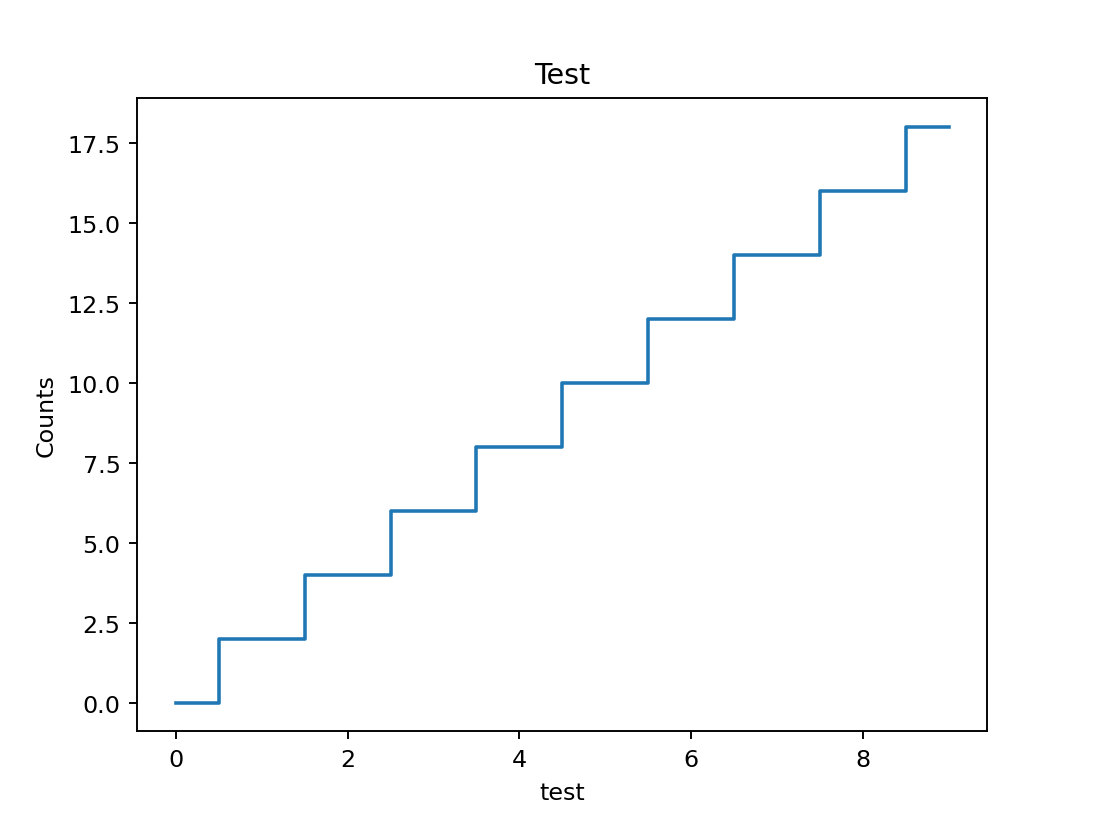

<AxesSubplot: title={'center': 'Test'}, xlabel='test', ylabel='Counts'>

In [38]:
fig, ax = plt.subplots()
ax.set_xlabel('test')
v.plot(ax=ax)

In [39]:
v.save('test')

In [40]:
u = om.Vector.from_path('test')

<IPython.core.display.Javascript object>


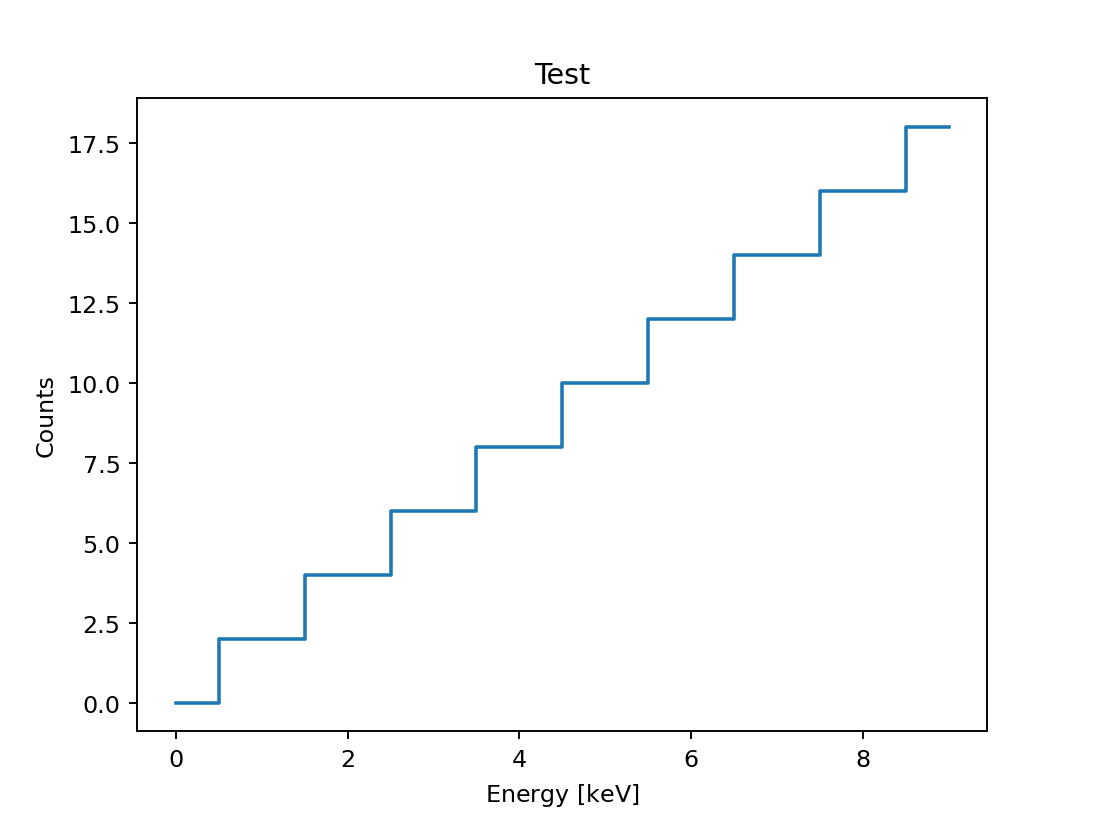

<AxesSubplot: title={'center': 'Test'}, xlabel='Energy [$\\mathrm{keV}$]', ylabel='Counts'>

In [43]:
u.plot()

In [44]:
print(u)

Index alias: Eo	Value alias: 
xlabel: Energy	 ylabel: Counts
Metadata:
	ordered: False
Index: 0.0 to 9.0 [keV]
10 bins with step: 1.0 keV
Total counts: 90.0

Values:
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


In [31]:
w = u.clone(values=2*u.values, xalias='fish')

<IPython.core.display.Javascript object>


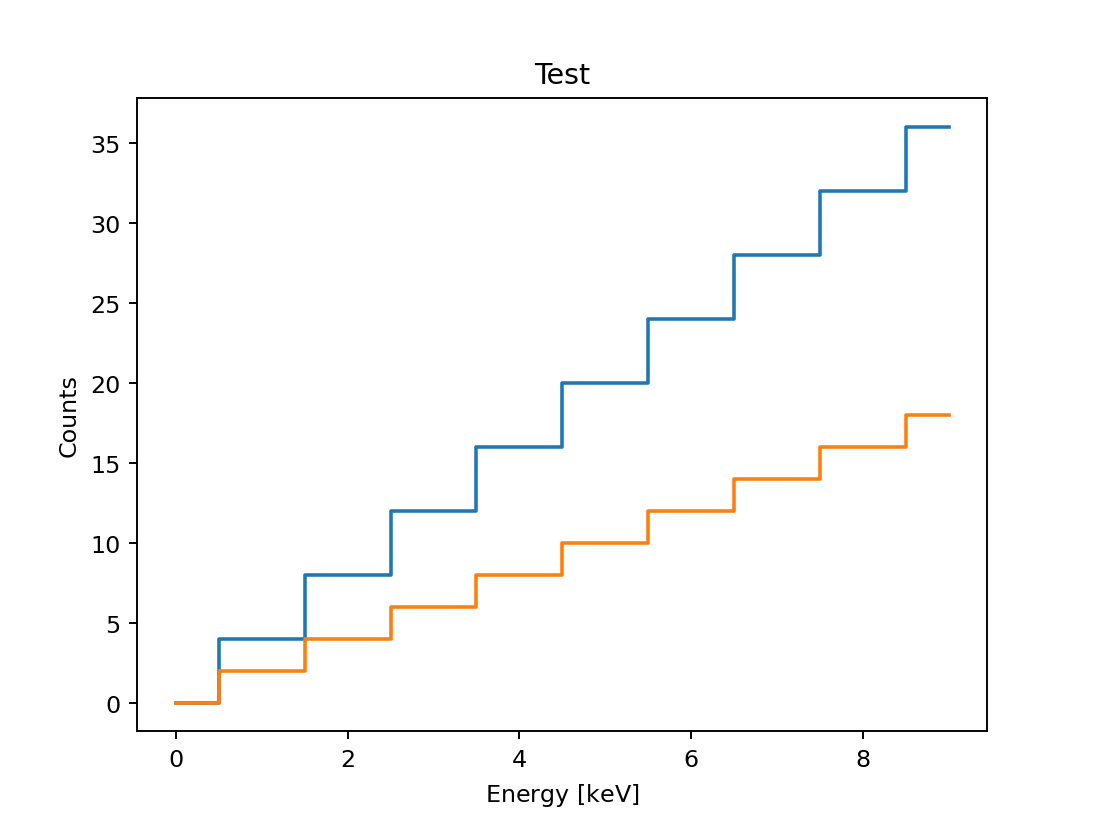

<AxesSubplot: title={'center': 'Test'}, xlabel='Energy [$\\mathrm{keV}$]', ylabel='Counts'>

In [32]:
ax = w.plot()
u.plot(ax=ax)

In [36]:
w.summary()

Index alias: fish	Value alias: 
Index: 0.0 to 9.0 [keV]
10 bins with step: 1.0 keV
Total counts: 180.0



In [35]:
w.fish

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [23]:
a = np.array([1,2,3,4])
a.flags.C_k

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [26]:
m = om.Matrix(Eg=x, Ex=x, values=np.empty((len(x), len(x))))
print(m)

Eᵧ: 0.0 to 9.0 [keV]
10 bins with dEᵧ: 1.0
Eₓ: 0.0 to 9.0 [keV]
10 bins with dEₓ: 1.0
Total counts: 6.635400370408992e-308

Values:
[[4.68270374e-310 0.00000000e+000 0.00000000e+000 6.93534089e-310
  4.64421707e-322 6.93534035e-310 6.93534035e-310 6.93534032e-310
  6.93534032e-310 6.93534035e-310]
 [6.93534035e-310 6.93534035e-310 6.93534035e-310 6.93534035e-310
  6.93534036e-310 6.93534034e-310 6.93534033e-310 6.93534035e-310
  6.93534035e-310 6.93534034e-310]
 [6.93534035e-310 6.93534035e-310 6.93534035e-310 6.93534035e-310
  6.93534035e-310 6.93534034e-310 6.93534035e-310 6.93534035e-310
  6.93534035e-310 6.93534035e-310]
 [6.93534035e-310 6.93534035e-310 6.93534034e-310 6.93534035e-310
  6.93534035e-310 6.93534034e-310 6.93534034e-310 6.93534035e-310
  6.93534035e-310 6.93534035e-310]
 [6.93534035e-310 6.93534035e-310 6.93534035e-310 6.93534035e-310
  6.93534035e-310 6.93534035e-310 6.93534035e-310 6.93534035e-310
  6.93534035e-310 6.93534035e-310]
 [6.93534035e-310 6.93534035e-310

In [22]:
v = om.Vector(counts=x, style=y, xlabel='fish')

<IPython.core.display.Javascript object>


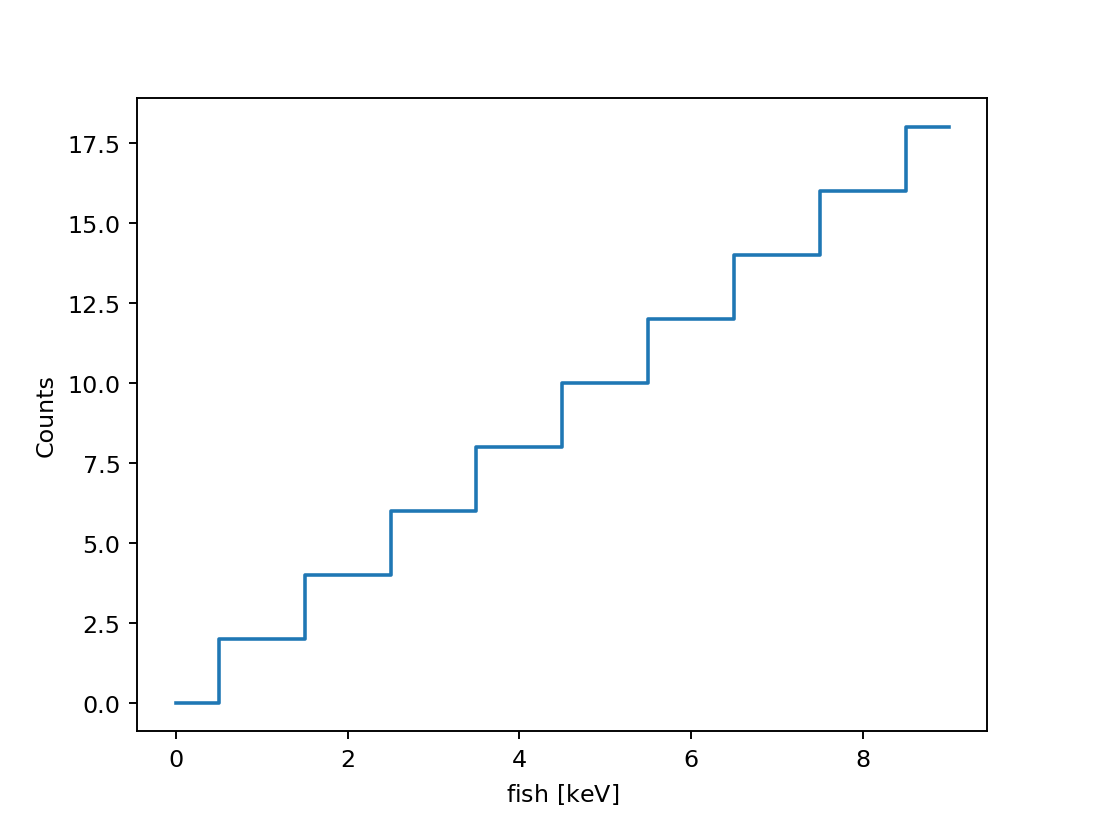

<AxesSubplot: xlabel='fish [$\\mathrm{keV}$]', ylabel='Counts'>

In [23]:
v.plot()

In [20]:
v.style *= 2

In [14]:
v.metadata

VectorMetadata(xalias='E', valias='', xlabel='Energy', ylabel='Counts', name='', misc={})

In [50]:
a = {'a': 5, 'b': [12,3,45], 'c':'test', 'd': {'g':'c', 'x':{'a':1, 'b':2}}}
np.savez('test.npz', **a)

In [51]:
b = np.load('test.npz', allow_pickle=True)

In [52]:
b['d'][()]

{'g': 'c', 'x': {'a': 1, 'b': 2}}

In [34]:
from dataclasses import asdict

In [35]:
asdict(om.array.vector.VectorMetadata())

{'xalias': 'E',
 'valias': '',
 'xlabel': 'Energy',
 'ylabel': 'Counts',
 'name': '',
 'misc': {}}

In [56]:
if not None: 
    print('x')

x


# indices

In [2]:
x = np.linspace(0, 10, 10)
X = om.array.MidUniformIndex(x)

TypeError: Index.__init__() missing 1 required positional argument: 'boundary'

In [81]:
x = np.linspace(0, 10, 10000)
val = np.exp(-(x-5)**2/2)
u = om.Vector(E=x, values=val)

In [109]:
y = np.linspace(0, 10, 6879)
rebinned = np.zeros_like(y)
dx = x[1] - x[0]
dy = y[1] - y[0]
om.array.rebin.__rebin_uniform_left_left(rebinned, x, y, val, dx, dy)

In [110]:
v = u.rebin(bins=y)

<IPython.core.display.Javascript object>


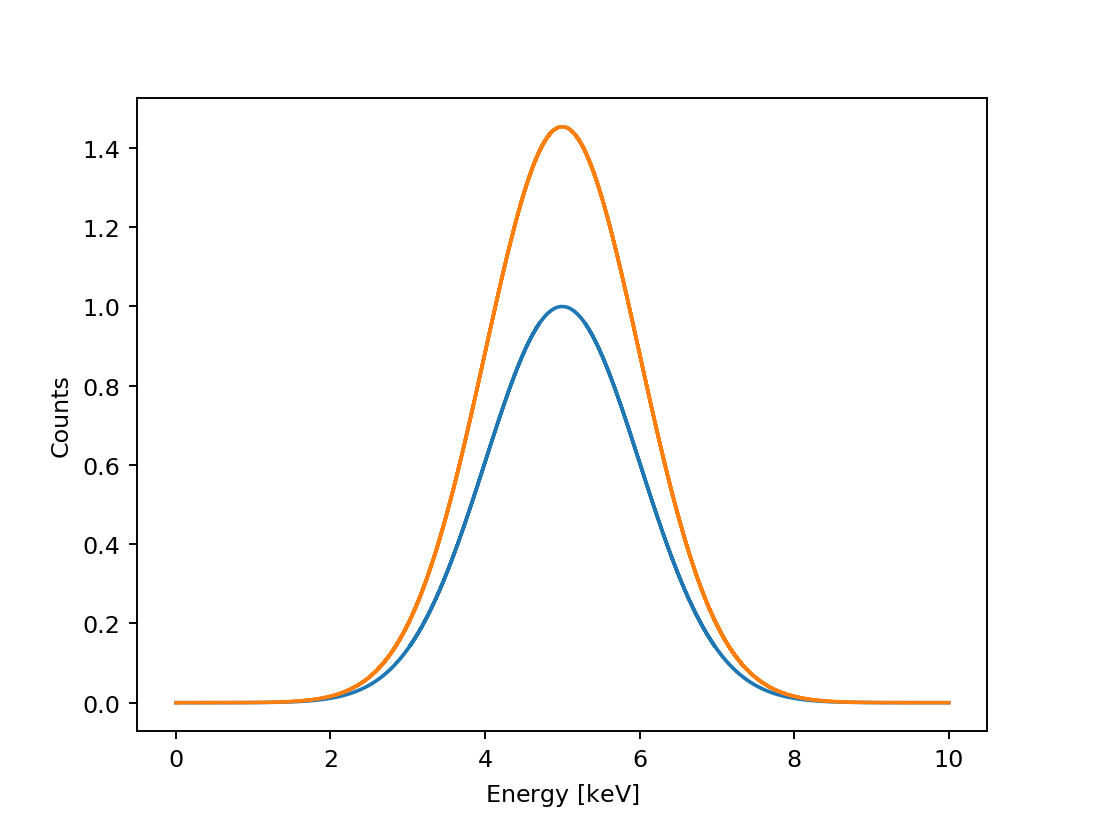

<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]', ylabel='Counts'>

In [111]:
ax = u.plot()
v.plot(ax=ax)

In [112]:
def density(x, u):
    v = np.zeros_like(x)
    for i in range(len(x)-1):
        s = u.vloc[x[i]:x[i+1]]
        s /= len(s) * u.dX
        v[i] = sum(s)
    return v

<IPython.core.display.Javascript object>


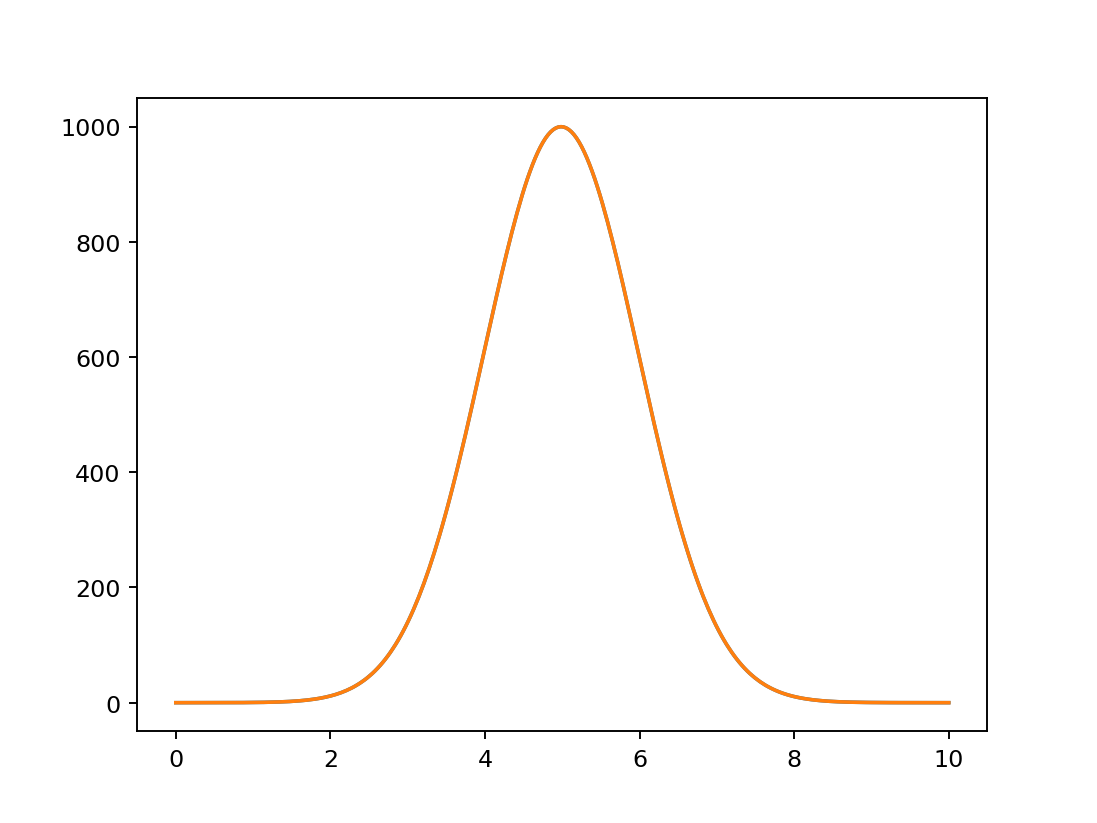

In [115]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 300)
pu = density(x, u)
pv = density(x, v)
ax.plot(x, density(x, u))
ax.plot(x, density(x, v))

<IPython.core.display.Javascript object>


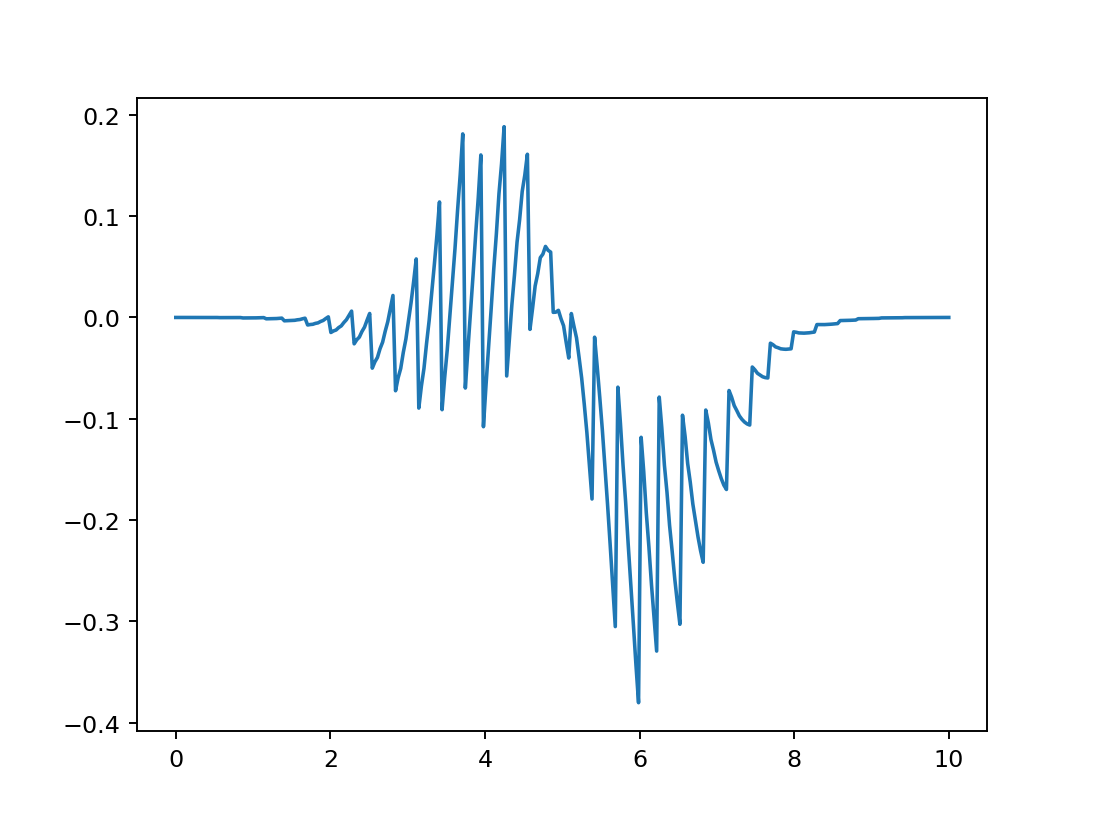

In [117]:
fig, ax = plt.subplots()
ax.plot(x, (pu-pv))

In [7]:
x = np.linspace(-5, 7, 15000)
v = np.exp(-(x-2)**2/0.3)
w = om.Vector(X=x, values=v, xlabel="Radiation").to_unit('MeV').to_mid()

In [5]:
#w.plot()
ww = w.rebin_like(u)
print(ww._index)

Index left uniform with 10000 bins [MeV] : X₀ = 0.00, ΔX = 0.00
Label: Radiation
[0.00000000e+00 1.00010001e-06 2.00020002e-06 ... 9.99799980e-03
 9.99899990e-03 1.00000000e-02]
Index left uniform with 10000 bins [MeV] : X₀ = 0.00, ΔX = 0.00
Label: Radiation
[0.00000000e+00 1.00010001e-06 2.00020002e-06 ... 9.99799980e-03
 9.99899990e-03 1.00000000e-02]


<IPython.core.display.Javascript object>


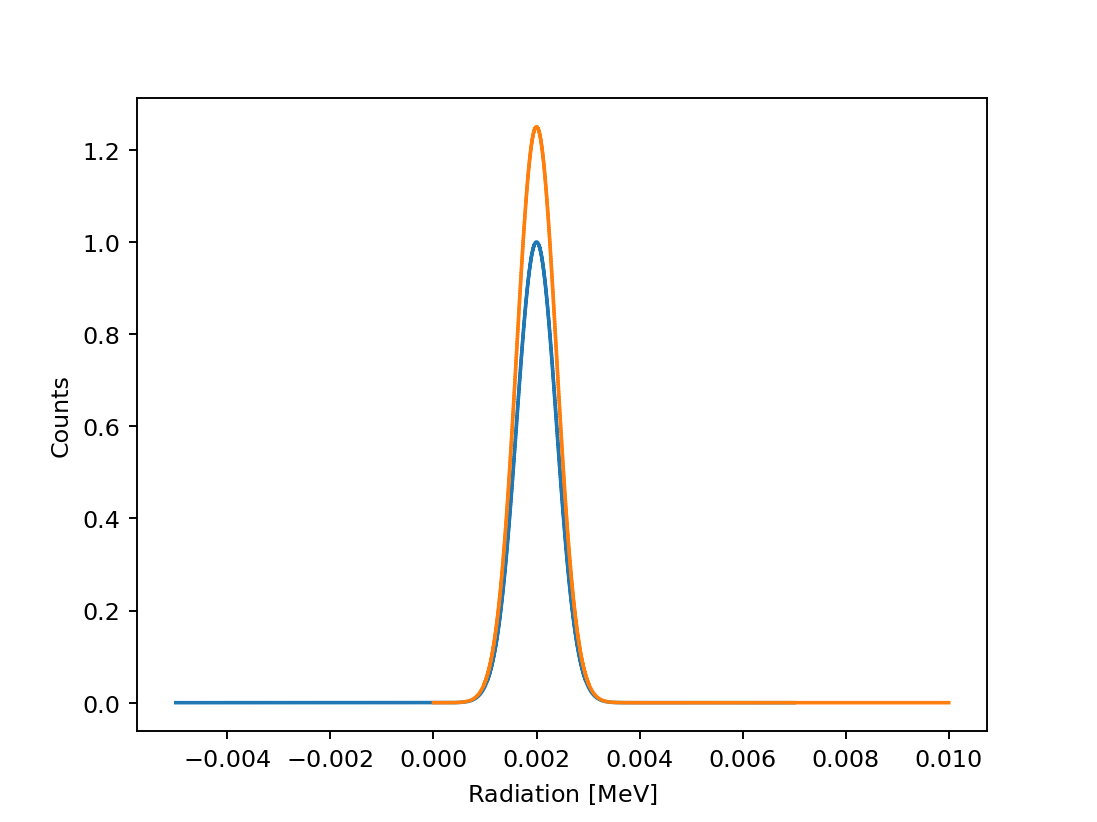

<AxesSubplot: xlabel='Radiation [$\\mathrm{MeV}$]', ylabel='Counts'>

In [6]:
ax = w.plot()
ww.plot(ax=ax)

array([ True,  True,  True, ...,  True,  True,  True])

In [43]:
x = np.linspace(0, 10, 11)
X = om.array.MidUniformIndex.from_array(x, extrapolate_boundary=True)
print(X.bins)
print(X.boundary)
print(len(x))
print(X.rightmost)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
-0.5
11
10.5


In [42]:
Y = X.to_left()
print(Y)
print(Y.bins)
Z = Y.to_mid()
print(Z)
print(Z.bins)
print(Z.boundary)

Index left uniform with 11 bins: X₀ = -0.50, ΔX = 1.00
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]
Index mid uniform with 11 bins: X₀ = -0.50, ΔX = 1.00
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
-0.5


In [48]:
X == Z

True

In [53]:
Y._hash

787982032895369978

In [20]:
om.array.MidUniformIndex.from_extrapolate(x, 20, 'left').bins

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [306]:
x = np.linspace(-5, 10, 20)
y = np.linspace(-7, 10, 10)
dx = np.repeat(x[1] - x[0], len(x))
dy = np.repeat(y[1] - y[0], len(y))
v = np.exp(-(x-5)**2/3)
v = x
#v = np.ones_like(x) + np.random.random(len(x))

In [282]:
a, b =om.array.rebin.__rebin_nonuniform_left_left_encode(x, y, dx, dy, True)

In [283]:
z = np.zeros_like(y)
#%timeit om.array.rebin.__rebin_nonuniform_left_left_decode(z, a, b, v)
om.array.rebin.__rebin_nonuniform_left_left_decode(z, a, b, v)

array([-9.59064327, -6.08187135, -2.57309942,  0.93567251,  4.44444444,
        7.95321637, 11.4619883 , 14.97076023, 18.47953216, 10.        ])

In [64]:
rebinned = np.empty_like(y)
#%timeit om.array.rebin.__rebin_uniform_left_left(rebinned, x, y, v, dx[0], dy[0])

41 µs ± 6.96 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [122]:
fig, ax = plt.subplots()
ax.step(x, v)
ax.step(y, z)

<IPython.core.display.Javascript object>

In [324]:
X = om.Vector(X=x, values=v)
Y = X.rebin(bins=y, preserve='area')
Z = om.Vector(X=y, values=z)

0 8 19


<IPython.core.display.Javascript object>


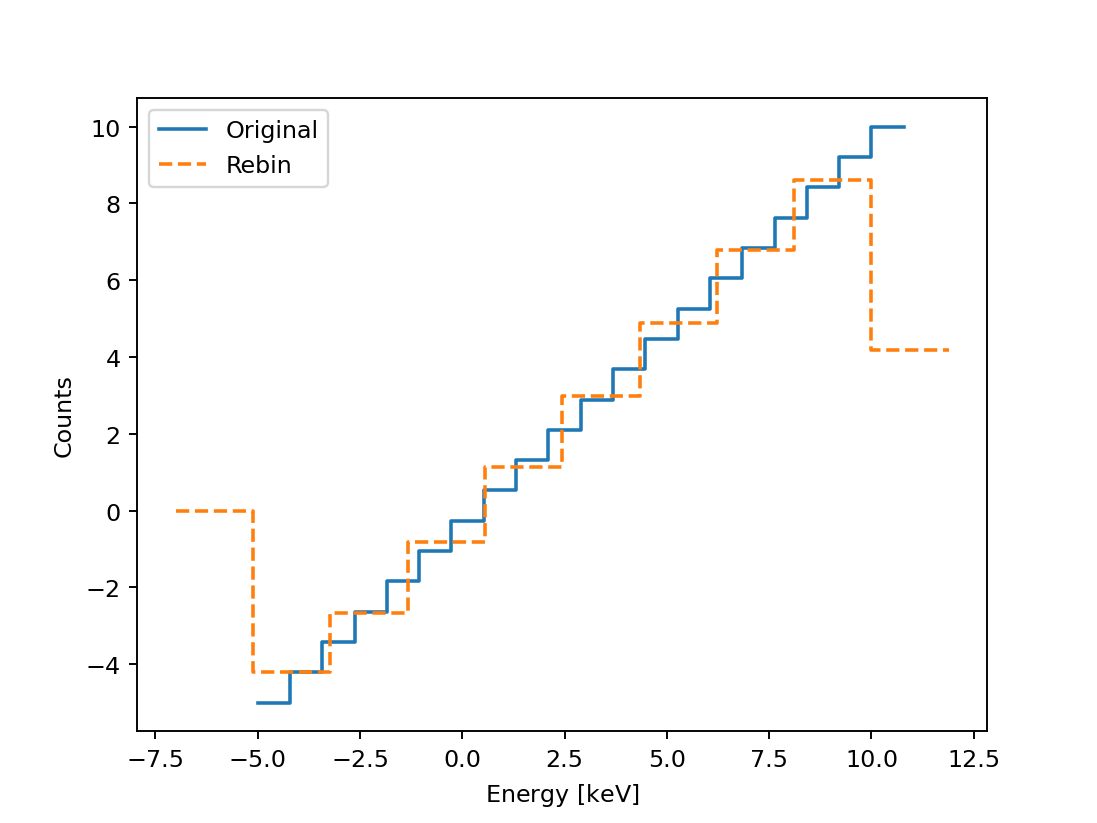

In [325]:
ax = X.plot(label="Original")
Y.plot(ax=ax, label="Rebin", ls='--')
#Z.plot(ax=ax, label="Rebin 2", ls='--')
ax.legend()

In [326]:
print(f"{sum(X)}")
print(sum(Y))
print(sum(Z))
print(X.integrate())
print(Y.integrate())
print(Z.integrate())

50.0
20.897832817337463
50.000000000000014
39.47368421052633
39.47368421052633
94.44444444444449


In [272]:
X._index.ticks()

array([-5.        , -4.21052632, -3.42105263, -2.63157895, -1.84210526,
       -1.05263158, -0.26315789,  0.52631579,  1.31578947,  2.10526316,
        2.89473684,  3.68421053,  4.47368421,  5.26315789,  6.05263158,
        6.84210526,  7.63157895,  8.42105263,  9.21052632, 10.        ,
       10.78947368])

In [273]:
Y._index.ticks()

array([-5.   , -3.125, -1.25 ,  0.625,  2.5  ,  4.375,  6.25 ,  8.125,
       10.   , 11.875])

In [274]:
Z._index.ticks()

array([-5.   , -3.125, -1.25 ,  0.625,  2.5  ,  4.375,  6.25 ,  8.125,
       10.   , 11.875])

In [275]:
Z._index.boundary, Y._index.boundary

(11.875, 11.875)

<IPython.core.display.Javascript object>


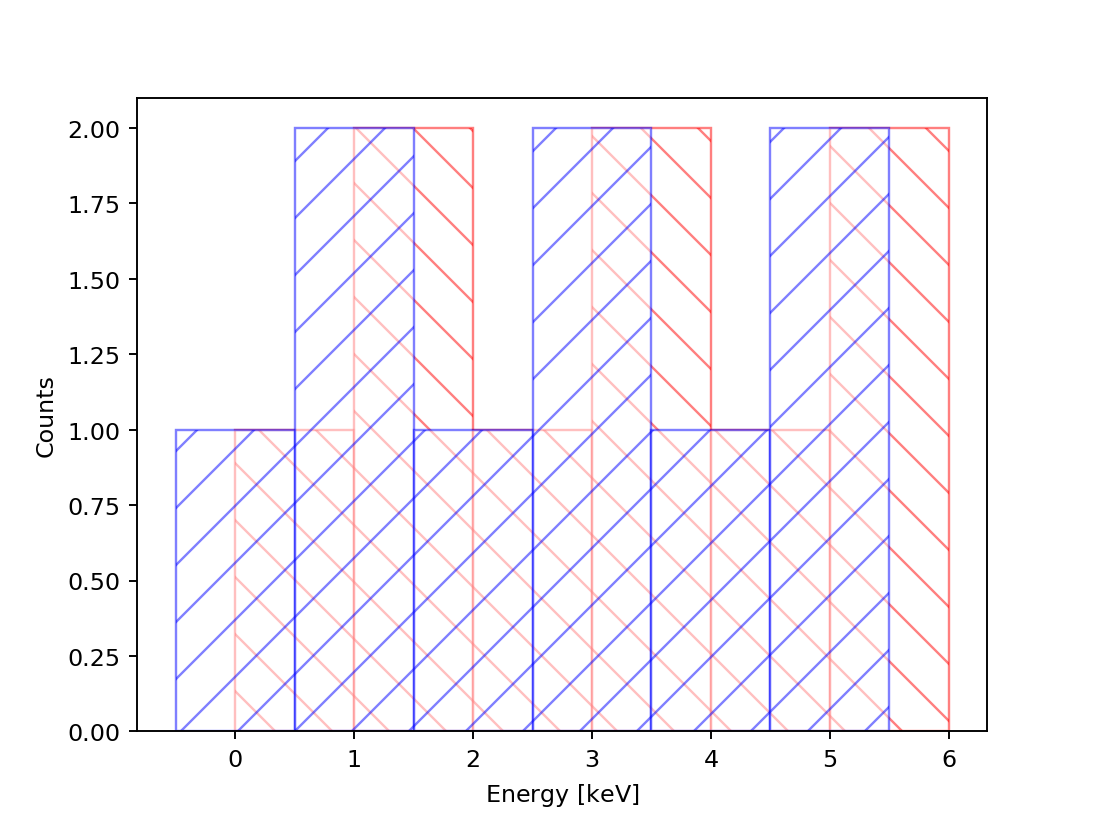

<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]', ylabel='Counts'>

In [252]:
A = [0, 1, 2, 3, 4, 5]
B = [1, 2, 1, 2, 1, 2]
C = om.Vector(A=A, B=B)
ax=C.plot(kind='bar', hatch='\\', alpha=0.5, facecolor='white', edgecolor='r')
C = om.Vector(A=A, B=B, edge='mid')
C.plot(ax=ax, kind='bar', hatch='/', alpha=0.5, facecolor='white', edgecolor='b')

<IPython.core.display.Javascript object>


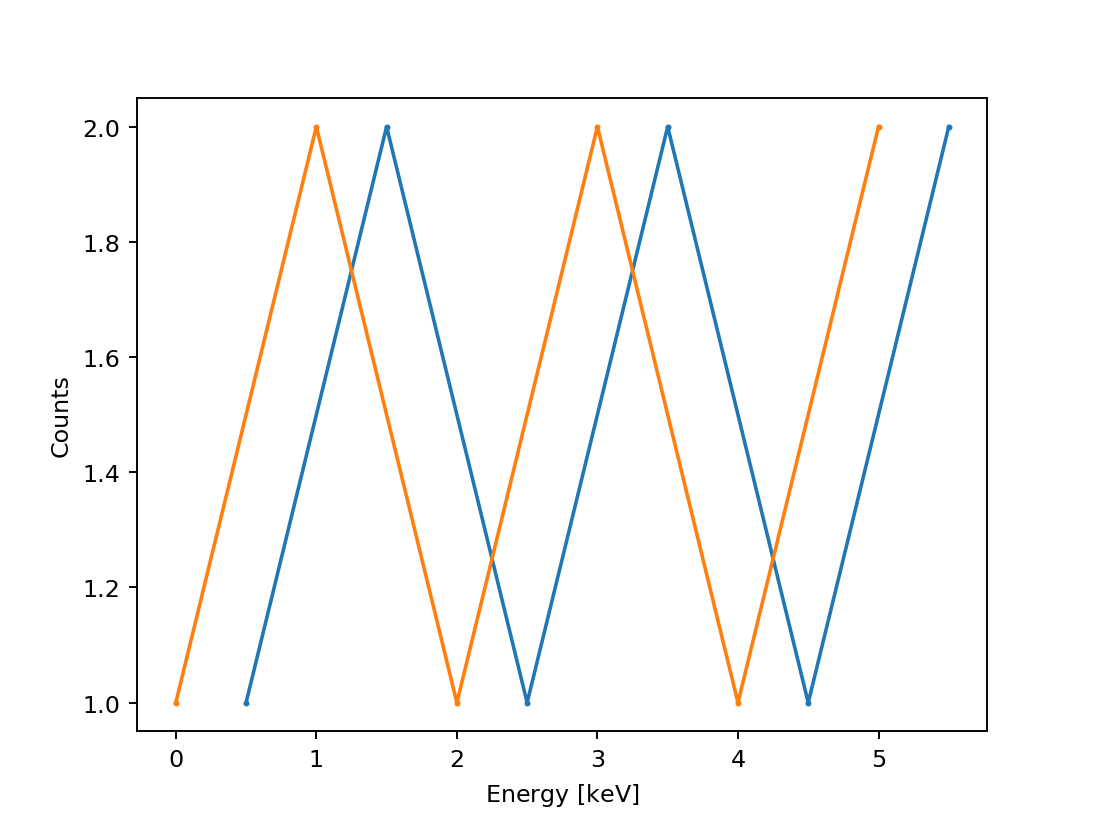

<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]', ylabel='Counts'>

In [255]:
A = [0, 1, 2, 3, 4, 5]
B = [1, 2, 1, 2, 1, 2]
C = om.Vector(A=A, B=B)
ax=C.plot(kind='line')
C = om.Vector(A=A, B=B, edge='mid')
C.plot(ax=ax, kind='line')

# Matrix

In [79]:
x = np.linspace(0.1, 10, 1000)
y = np.linspace(2, 5, 1500)
z = np.outer(1e-4*y, 1e-4*x)
m = om.Matrix(Ex=y, Eg=x, values=z)

<IPython.core.display.Javascript object>


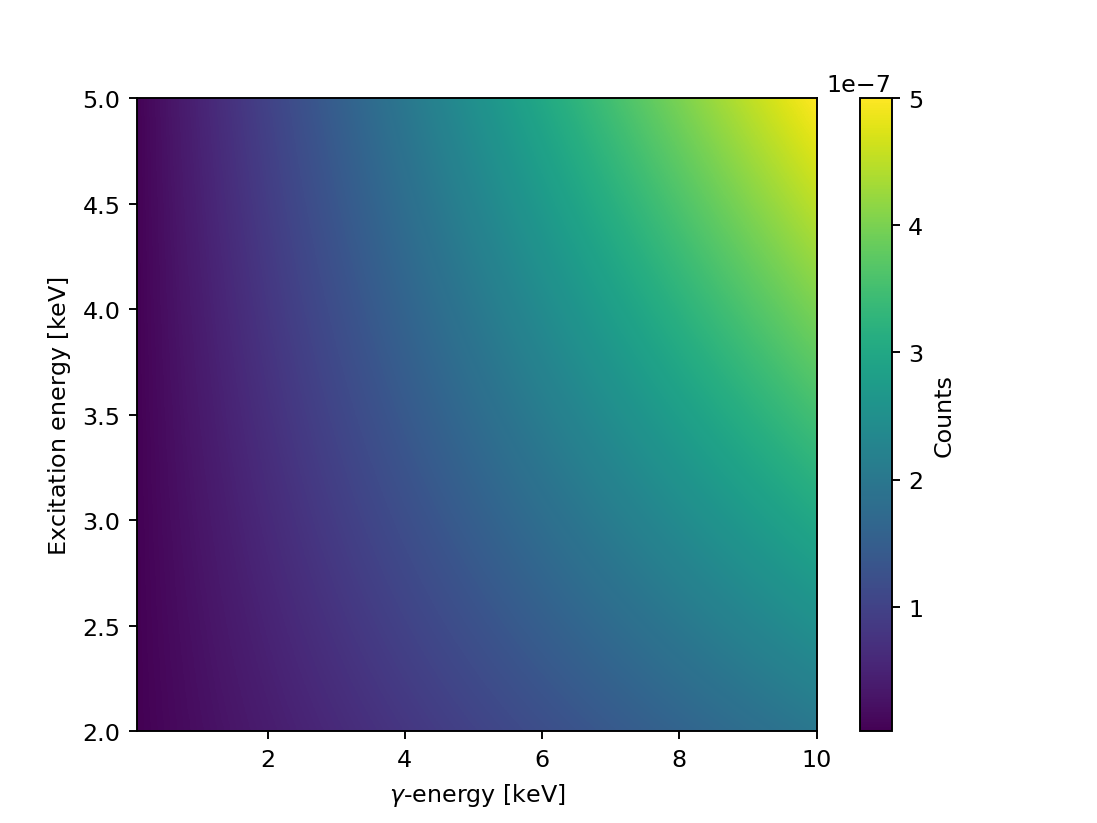

(<AxesSubplot: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fb5d543a980>,
  <matplotlib.colorbar.Colorbar at 0x7fb5d511b160>))

In [83]:
m.plot()

In [63]:
m.to_mid('Eg').plot(mouseover=False)

<IPython.core.display.Javascript object>

(5, 10) (6,) (11,)


(<AxesSubplot: xlabel='$\\gamma$-energy [$\\mathrm{keV}$]', ylabel='Excitation energy [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f39c68161d0>,
  <matplotlib.colorbar.Colorbar at 0x7f39c684b8b0>))

In [84]:
n = np.linspace(2, 5, 500)
new = om.array.rebin.rebin_2D_uniform_left_left(y, n, z, 0)

In [87]:
n = np.linspace(0.1, 10, 500)
new = om.array.rebin.rebin_2D_uniform_left_left(x, n, z, 1)

In [88]:
#M = om.Matrix(Ex=n, Eg=x, values=new)
M = om.Matrix(Ex=y, Eg=n, values=new)

<IPython.core.display.Javascript object>


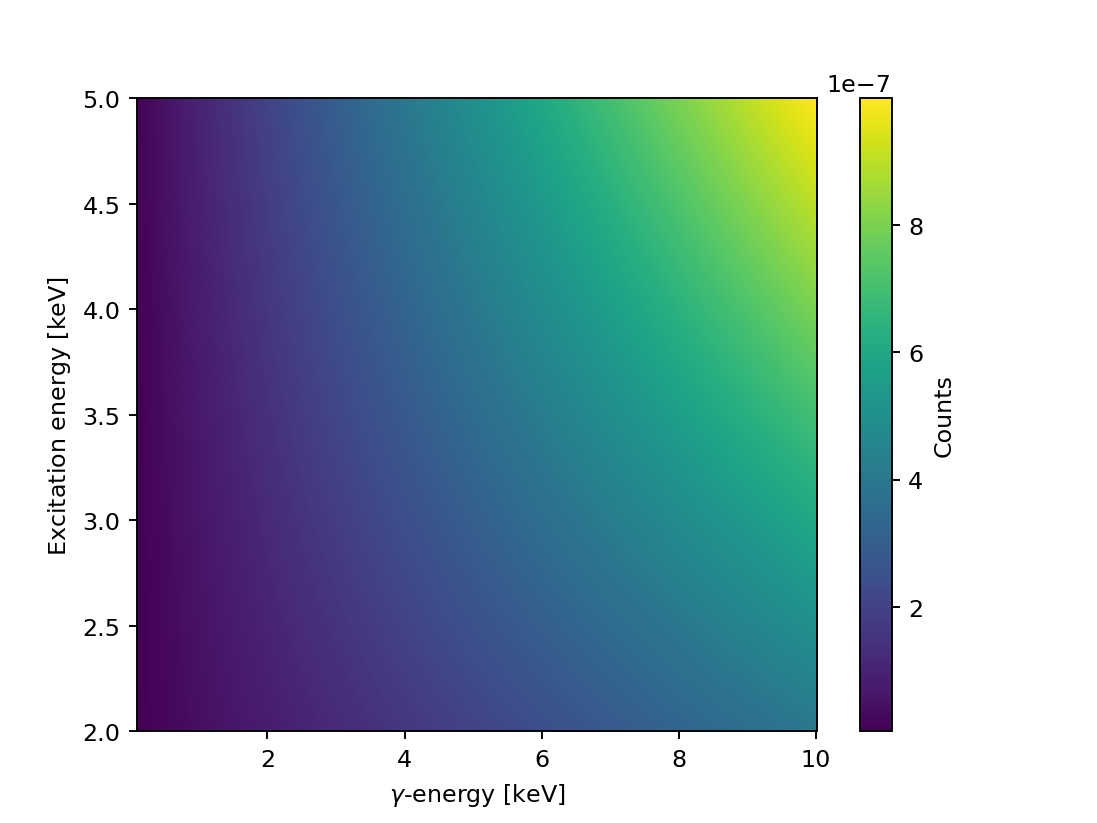

<IPython.core.display.Javascript object>


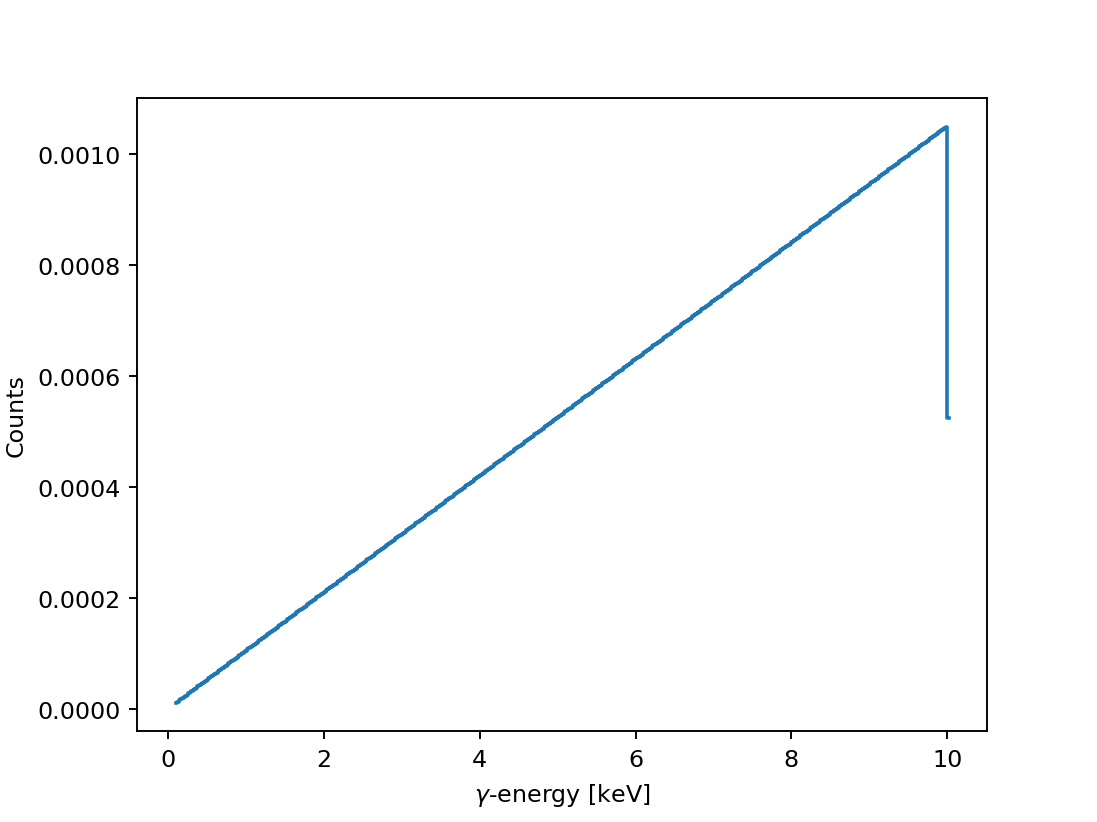

<IPython.core.display.Javascript object>


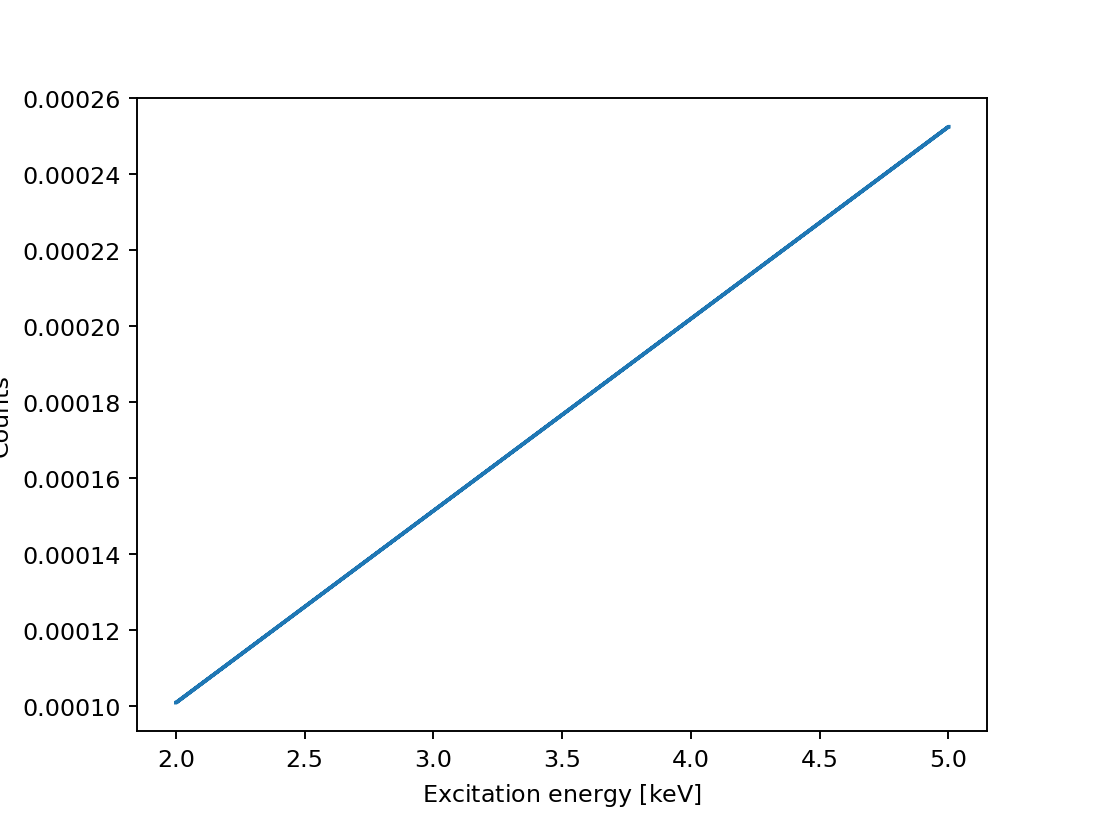

<AxesSubplot: xlabel='Excitation energy [$\\mathrm{keV}$]', ylabel='Counts'>

In [90]:
M.plot()
M.sum(axis=0).plot()
M.sum(axis=1).plot()

In [33]:
m.shape

(150, 100)

In [34]:
m.X.shape

(150,)

In [35]:
m.Y.shape

(100,)

In [40]:
m.values.sum(axis=1).shape

(150,)

In [41]:
?m.values.sum

In [52]:
from numba import njit

In [59]:
@njit
def foo():
    return np.zeros(10, dtype=np.bool8)

In [60]:
foo()

array([False, False, False, False, False, False, False, False, False,
       False])

In [91]:
x = 119000
y = 1034750
x/y

[autoreload of ompy.array.matrix failed: Traceback (most recent call last):
  File "/usr/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/usr/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/erdos/gits/ompydock/ompy/array/matrix.py", line 457
    bins: Index = self.
                       ^
SyntaxError: invalid syntax
]


0.11500362406378352

In [32]:
dx = np.asarray([1, 1, 2, 2, 3, 3, 4, 5])
dx = np.asarray([1, 2, 3, 4, 5, 6, 7])
dx = np.random.rand(8)
x = np.zeros(len(dx)+1)
x[0] = -3
x[1:] = x[0] + np.cumsum(dx)
print(x)
print(dx)
dx_ = np.append(dx, 7)
m = x + 1/2*dx_
print(m)

[-3.         -2.63334258 -2.47317629 -1.55214912 -1.21070547 -0.73245359
 -0.0250328   0.46307924  1.35475588]
[0.36665742 0.16016629 0.92102717 0.34144364 0.47825188 0.70742079
 0.48811204 0.89167665]
[-2.81667129 -2.55325943 -2.0126627  -1.38142729 -0.97157953 -0.3787432
  0.21902322  0.90891756  4.85475588]


In [3]:
om.array.index.widths_from_mid_left(m, x[0])

array([0.36597762, 0.0549857 , 0.19667979, 0.70163847, 0.67974445,
       0.8317887 , 0.49581805, 0.72760889, 7.        ])

In [45]:
M = om.array.MidNonUniformIndex.from_array(m, boundary=x[0])
print(M)

Index mid nonuniform with 9 bins [keV] 
[-2.81667129 -2.55325943 -2.0126627  -1.38142729 -0.97157953 -0.3787432
  0.21902322  0.90891756  4.85475588]


In [55]:
samples = m + 2*(np.random.random(len(x)) - 0.5)*dx_
for i in range(len(x)):
    y = m[i]
    print(f"{i}: {y - dx_[i]/2: .3f} < {samples[i]: .3f} < {y+dx_[i]/2: .3f}")

0: -3.000 < -2.709 < -2.633
1: -2.633 < -2.505 < -2.473
2: -2.473 < -1.980 < -1.552
3: -1.552 < -1.405 < -1.211
4: -1.211 < -1.065 < -0.732
5: -0.732 < -0.299 < -0.025
6: -0.025 <  0.361 <  0.463
7:  0.463 <  0.737 <  1.355
8:  1.355 <  5.415 <  8.355


In [63]:
2*(np.random.random(5) - 0.5) * dx_[:5]

array([-0.09877643, -0.09701535,  0.57111537, -0.01082869, -0.45054972])

In [80]:
for i in range(len(M)):
    s = M[i]
    dx = M.step(i)
    r = 1.9*(np.random.random() - 0.5)
    e = r * dx/2
    j = M.index(e+s)
    print(f"{i} => {s: .3f} ({dx:.3f}) => [{s-dx/2: .2f}, {s+dx/2: .2f}] ~{e: .3f} ~> {e+s: .3f} => {j}")

0 => -2.817 (0.367) => [-3.00, -2.63] ~ 0.005 ~> -2.811 => 0
1 => -2.553 (0.160) => [-2.63, -2.47] ~-0.022 ~> -2.576 => 1
2 => -2.013 (0.921) => [-2.47, -1.55] ~ 0.163 ~> -1.850 => 2
3 => -1.381 (0.341) => [-1.55, -1.21] ~ 0.095 ~> -1.287 => 3
4 => -0.972 (0.478) => [-1.21, -0.73] ~ 0.202 ~> -0.769 => 4
5 => -0.379 (0.707) => [-0.73, -0.03] ~ 0.082 ~> -0.296 => 5
6 =>  0.219 (0.488) => [-0.03,  0.46] ~-0.026 ~>  0.193 => 6
7 =>  0.909 (0.892) => [ 0.46,  1.35] ~-0.192 ~>  0.716 => 7
8 =>  4.855 (7.000) => [ 1.35,  8.35] ~ 0.640 ~>  5.495 => 8


In [79]:
r = 1.9*(np.random.random(1000) - 0.5)
print(min(r), max(r))

-0.9498392254779491 0.9453782524512047


In [40]:
dx = np.asarray([1, 1, 2, 2, 3, 3, 4, 5])
dx = np.asarray([1, 2, 3, 4, 5, 6, 7])
dx = np.random.rand(8)
x = np.zeros(len(dx)+1)
x[0] = -3
x[1:] = x[0] + np.cumsum(dx)
print(x)
print(dx)
dx_ = np.append(dx, 7)
m = x + 1/2*dx_
print(m)

4

In [47]:
om.array.index.widths_from_mid_right(m, x[-1]+dx_[-1])

array([0.30915758, 0.26205472, 0.11498068, 0.98769908, 0.29357095,
       0.79928253, 0.63776345, 0.02531216, 7.        ])

In [3]:
i = om.array.LeftNonUniformIndex.from_array(x)

In [ ]:
# print(i.bins)
print(i.boundary)
print(i.steps())

In [22]:
i.boundary - i[-1]

7.0

In [23]:
i[-1] - i[-2]

6.0

In [30]:
j = i.to_mid()
print(j.bins)
print(j.boundary)
print(j.steps())
k = j.to_left()
print(k.bins)
print(k.boundary)
h = k.to_mid()
print(h.bins)
print(h.boundary)
print(k == i)
print(h == j)

0 0.0 1.0 0.5 0.5
1 1.0 2.0 2.0 2.0
2 3.0 3.0 4.5 4.5
3 6.0 4.0 8.0 8.0
4 10.0 5.0 12.5 12.5
5 15.0 6.0 18.0 18.0
6 21.0 7.0 24.5 24.5
[ 0.5  2.   4.5  8.  12.5 18.  24.5]
0.0
[1. 2. 3. 4. 5. 6. 7.]
MID -> LEFT
21.0
7.0
28.0
<>
[ 0.  1.  3.  6. 10. 15. 21.]
28.0
0 0.0 1.0 0.5 0.5
1 1.0 2.0 2.0 2.0
2 3.0 3.0 4.5 4.5
3 6.0 4.0 8.0 8.0
4 10.0 5.0 12.5 12.5
5 15.0 6.0 18.0 18.0
6 21.0 7.0 24.5 24.5
[ 0.5  2.   4.5  8.  12.5 18.  24.5]
0.0
True
True


In [56]:
i.to_mid().boundary

[ 0.5  2.   4.5  8.  12.5 18.  24.5 31.5] -0.25 () {'metadata': IndexMetadata(alias='', label='', unit=<Unit('kiloelectron_volt')>)}
0 -0.25 1.5 0.5 0.5
1 1.25 1.5 2.0 2.0
2 2.75 3.5 4.5 4.5
3 6.25 3.5 8.0 8.0
4 9.75 5.5 12.5 12.5
5 15.25 5.5 18.0 18.0
6 20.75 7.5 24.5 24.5
7 28.25 6.5 31.5 31.5
mid:  [ 0.5  2.   4.5  8.  12.5 18.  24.5 31.5]
steps:  [1.5 1.5 3.5 3.5 5.5 5.5 7.5 6.5]


-0.25

In [52]:
j = om.array.MidNonUniformIndex.from_array(m)

[ 0.5  2.   4.5  8.  12.5 18.  24.5 31.5] -0.25 () {}
0 -0.25 1.5 0.5 0.5
1 1.25 1.5 2.0 2.0
2 2.75 3.5 4.5 4.5
3 6.25 3.5 8.0 8.0
4 9.75 5.5 12.5 12.5
5 15.25 5.5 18.0 18.0
6 20.75 7.5 24.5 24.5
7 28.25 6.5 31.5 31.5
mid:  [ 0.5  2.   4.5  8.  12.5 18.  24.5 31.5]
steps:  [1.5 1.5 3.5 3.5 5.5 5.5 7.5 6.5]


In [55]:
j.to_left()

In [40]:
s = np.empty(len(j))
s[0] = j.boundary + (j[0] - j.boundary)
for i in range(1, len(j)):
    s[i] = s[i-1] + j.step(i)

In [59]:
def foo(x, y):
    match x, y:
        case None, None:
            return -1
        case [a, b] if a is not None and b is not None:
            return -2
        case a, None:
            return a
        case None, b:
            return b

In [63]:
foo(None, -5)

-5

# Misc

In [42]:
v = 10.5
i = X.index(v)
print(v, i, X.left_edge(i), X.right_edge(i))

10.5 9 9.444444444444445 10.555555555555555


In [20]:
X.rightmost

11.11111111111111

In [7]:
X[0]

0.0

In [26]:
.assert_inbounds(1.1)

AttributeError: 'super' object has no attribute 'assert_inbounds'

In [75]:
X = np.arange(0, 5000, 0.5, dtype=float)
Y = np.arange(0, 10, 2, dtype=float)
Z = np.arange(-5, 5300, 0.6, dtype=float)
values = 2*X**0.7
new = om.array.rebin_uniform_left_left(X, Z, values, preserve='counts')

In [76]:
print(X)
print(values)
print(Z)
print(new)

[0.0000e+00 5.0000e-01 1.0000e+00 ... 4.9985e+03 4.9990e+03 4.9995e+03]
[  0.           1.23114441   2.         ... 776.63647446 776.69085451
 776.74523293]
[-5.0000e+00 -4.4000e+00 -3.8000e+00 ...  5.2984e+03  5.2990e+03
  5.2996e+03]
[0. 0. 0. ... 0. 0. 0.]


<IPython.core.display.Javascript object>


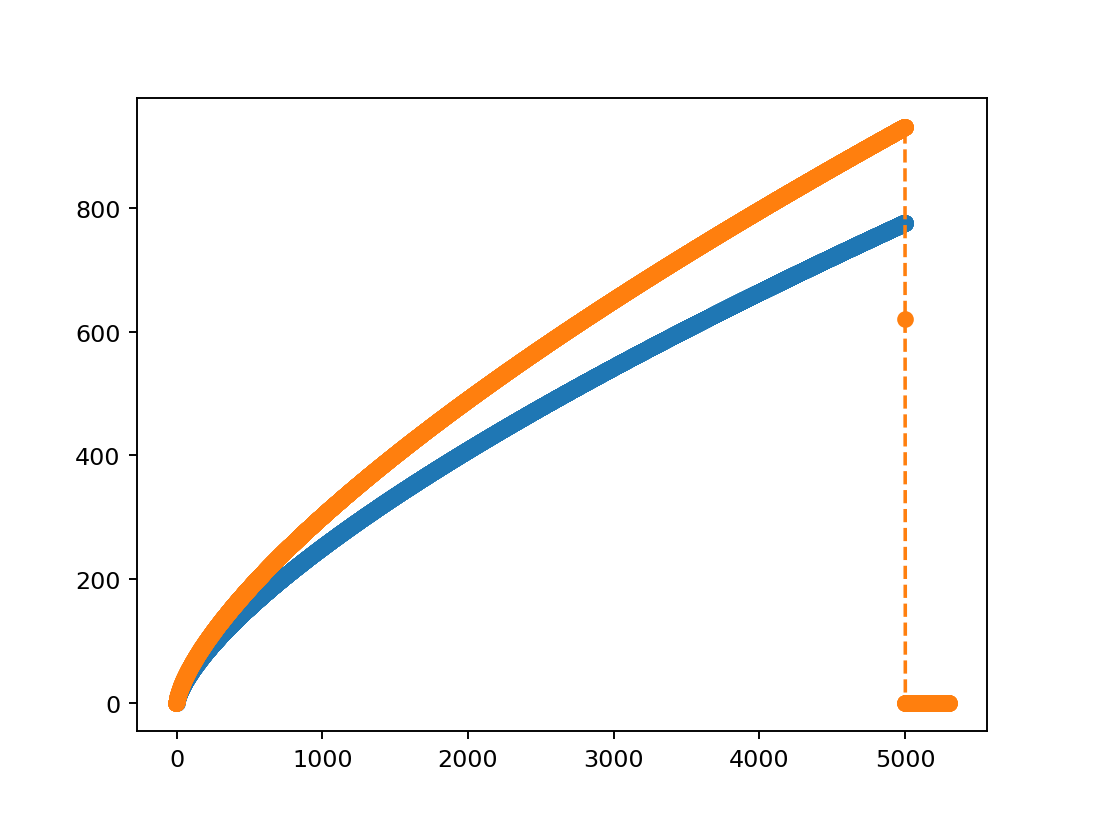

In [77]:
fig, ax = plt.subplots()
ax.plot(X, values, 'o-')
ax.plot(Z, new, 'o--')

In [73]:
sum(new)

4569020.893603816

In [74]:
sum(values)

4569020.893603433

In [6]:
X = np.arange(0, 10, 0.5, dtype=float)
Y = np.arange(0, 10, 2, dtype=float)
Z = np.arange(-5, 13, 0.6, dtype=float)
Xi = om.array.to_index(X)
Zi = om.array.to_index(Z, 'mid')
values = 2*X**0.7
ZZ, new = Xi.rebin(Zi, values)

<IPython.core.display.Javascript object>


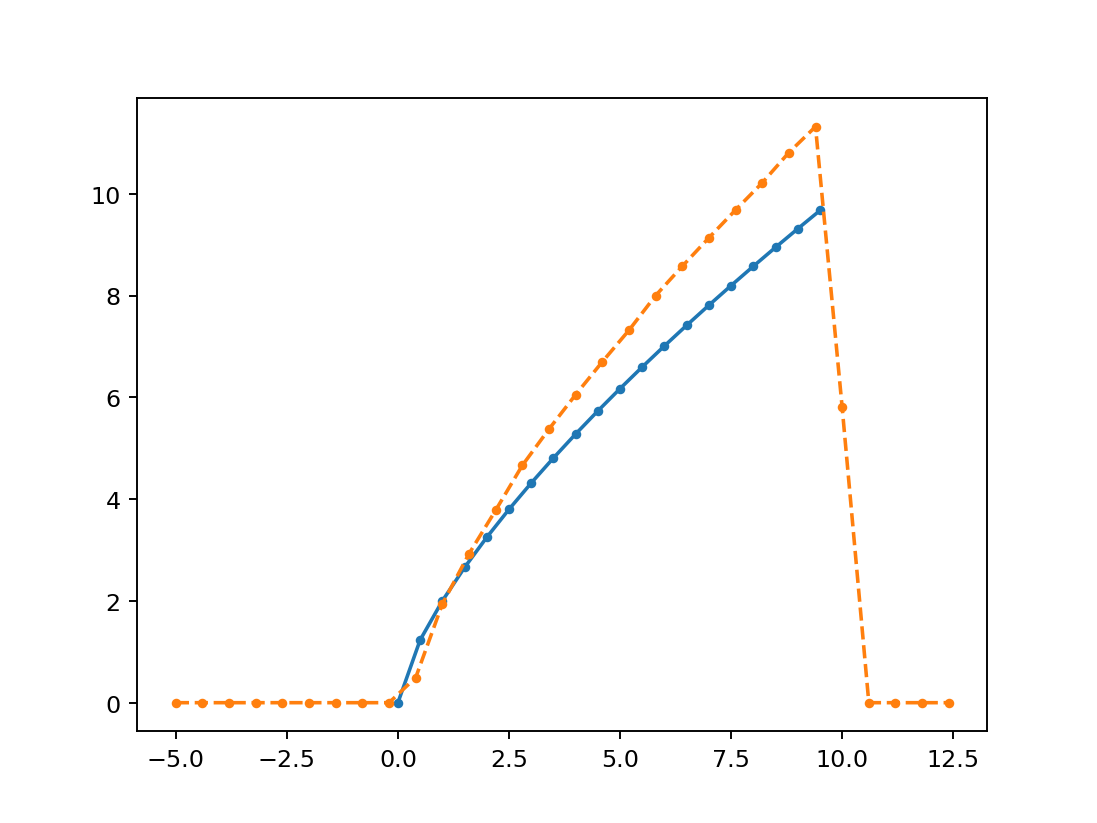

In [7]:
fig, ax = plt.subplots()
ax.plot(Xi.X, values, '.-')
ax.plot(Zi.X, new, '.--')

In [4]:
print(sum(values), sum(new))

4569020.893603433 4569020.893603817


In [5]:
all(Zi.X == ZZ.X)

True

<IPython.core.display.Javascript object>


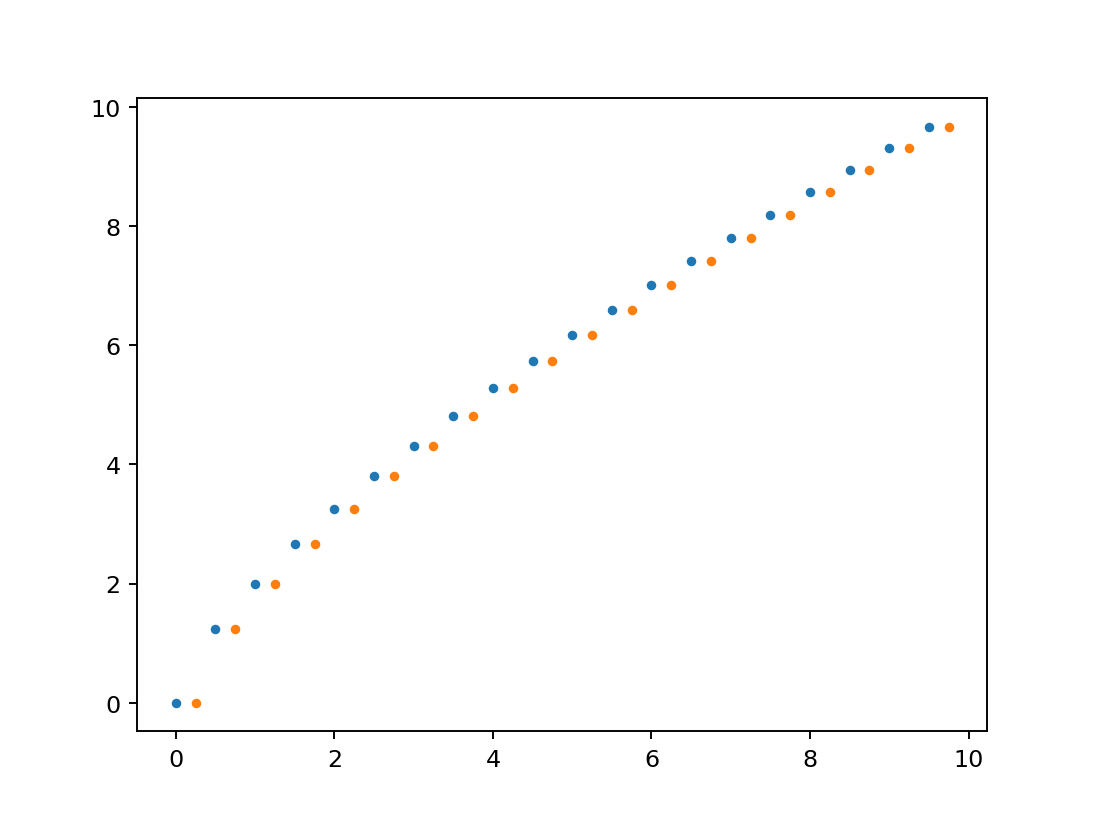

In [9]:
fig, ax = plt.subplots()
ax.plot(Xi.X, values, '.')
ax.plot(Xi.to_mid().X, values, '.')

In [10]:
Xi.X

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [11]:
Xi.to_mid().X

array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25,
       5.75, 6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25, 9.75])

In [14]:
Xi.to_mid().to_left().X

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [24]:
Xi.index(9.9)

19

In [25]:
m = Xi.to_mid()
print(m.X)
m.index(9.9)

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75 6.25 6.75
 7.25 7.75 8.25 8.75 9.25 9.75]


19

In [27]:
X = [0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.3]
Xi = om.array.to_index(X)

In [29]:
Xi.index(0.2)

AttributeError: 'LeftNonUniformIndex' object has no attribute 'step'

In [30]:
np.diff(X)

array([0.1, 0.2, 0.2, 0.2, 0.3, 0.3])

# Mat

In [26]:
N = 10
M = 30
x = np.linspace(0, 1, N)
y = np.linspace(0, 9, M)
v = np.outer(1+y, 1+x)
mat = om.Matrix(Eg=x, Ex=y, values=v)

<IPython.core.display.Javascript object>


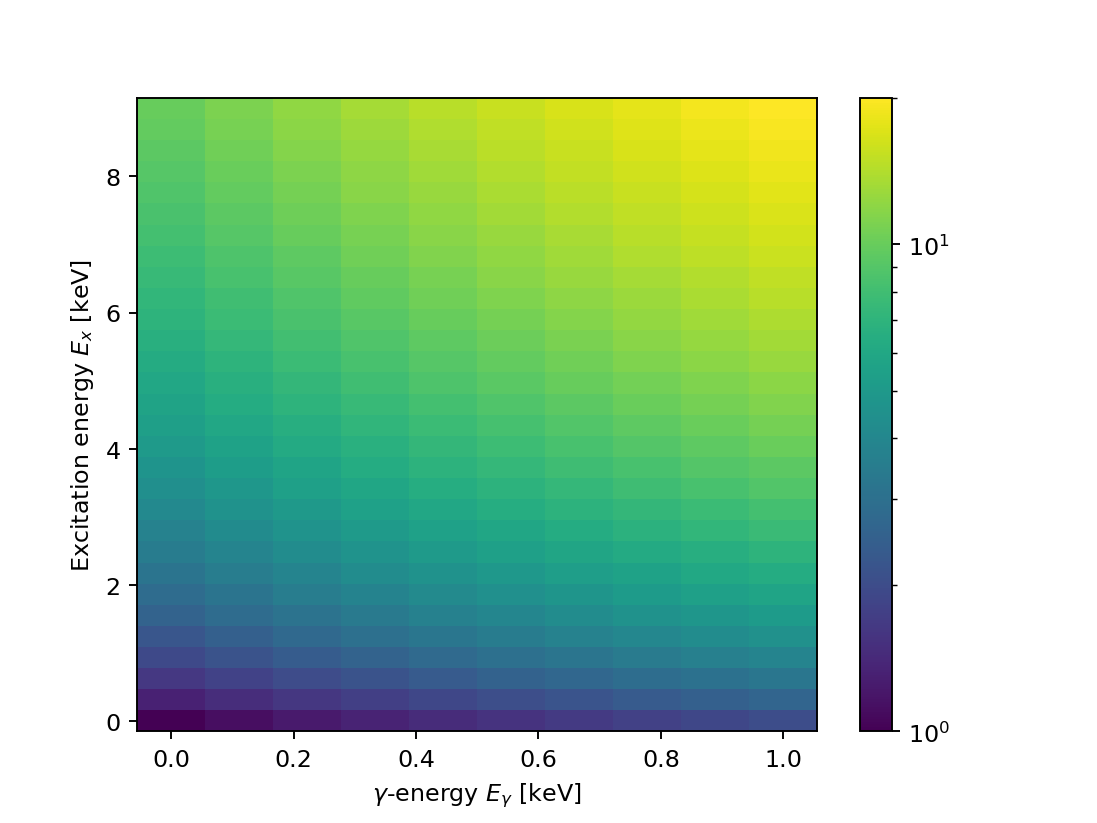

(<AxesSubplot: xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fca993ff370>,
  <matplotlib.colorbar.Colorbar at 0x7fca99493880>))

In [27]:
mat.plot()

In [28]:
U = mat.rebin('Ex', numbins=10)

<IPython.core.display.Javascript object>


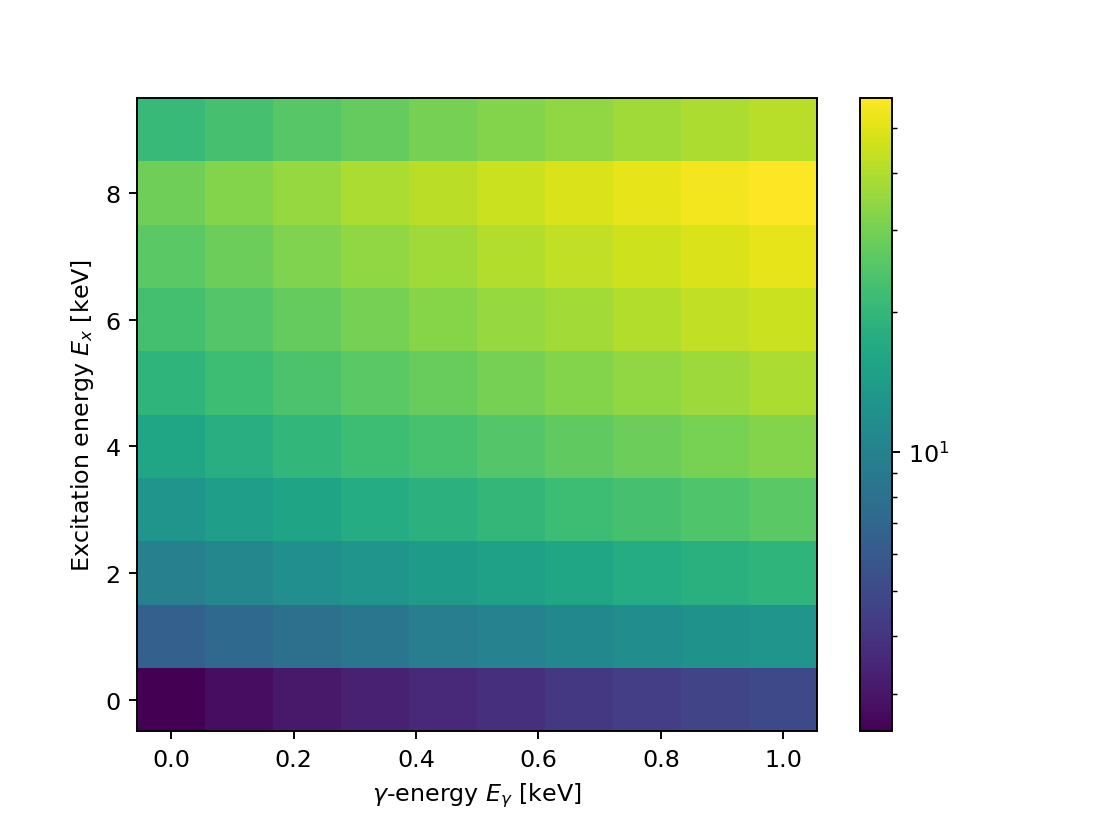

(<AxesSubplot: xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fca9dea2650>,
  <matplotlib.colorbar.Colorbar at 0x7fcaa07aef20>))

In [29]:
U.plot()

In [15]:
X = mat.sum(axis='Eg')

<IPython.core.display.Javascript object>


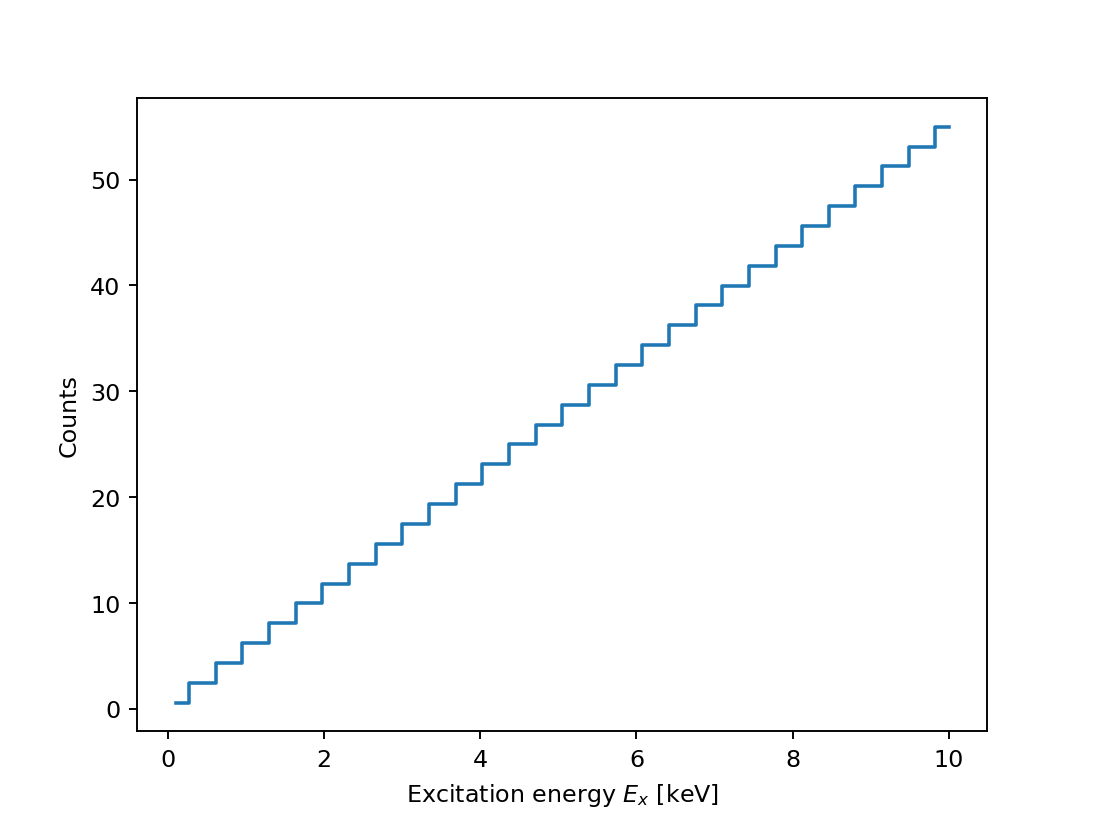

<AxesSubplot: xlabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]', ylabel='Counts'>

In [16]:
X.plot()

<IPython.core.display.Javascript object>


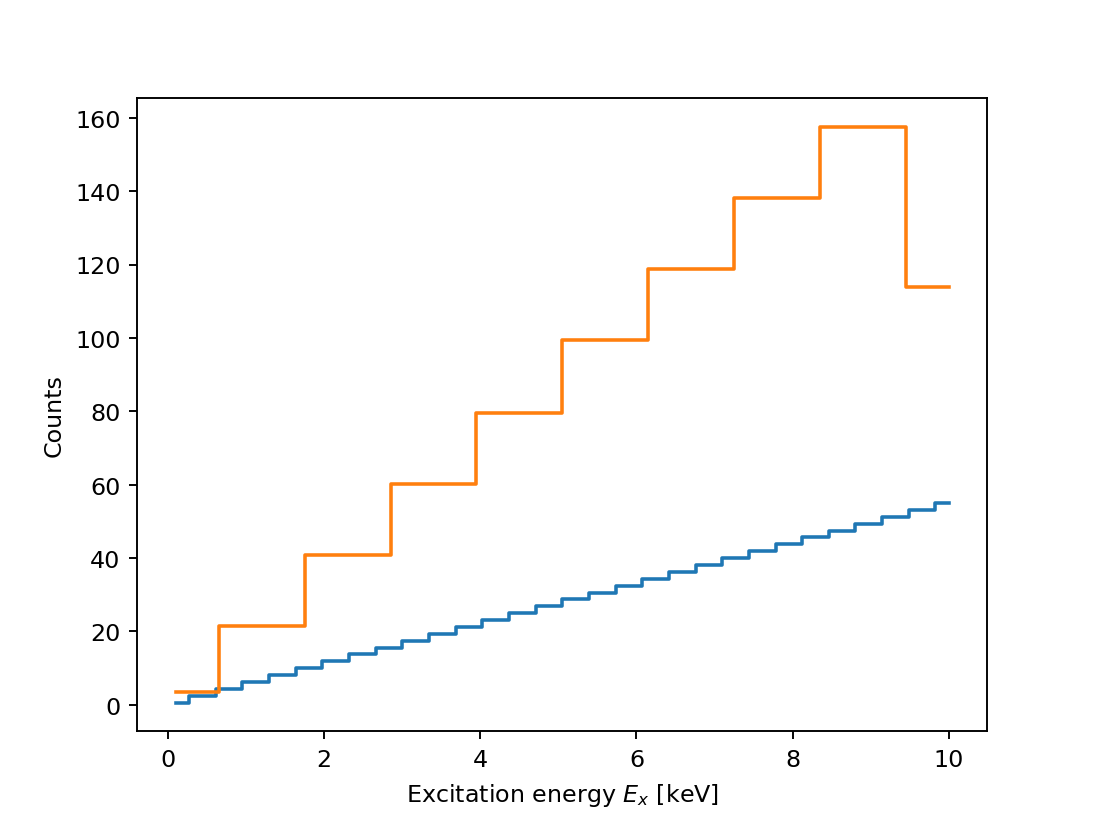

<AxesSubplot: xlabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]', ylabel='Counts'>

In [19]:
ax = X.plot()
U.sum(axis='Eg').plot(ax=ax)

In [22]:
U.Ex

array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ])

In [23]:
mat.Ex

array([ 0.1       ,  0.44137931,  0.78275862,  1.12413793,  1.46551724,
        1.80689655,  2.14827586,  2.48965517,  2.83103448,  3.17241379,
        3.5137931 ,  3.85517241,  4.19655172,  4.53793103,  4.87931034,
        5.22068966,  5.56206897,  5.90344828,  6.24482759,  6.5862069 ,
        6.92758621,  7.26896552,  7.61034483,  7.95172414,  8.29310345,
        8.63448276,  8.97586207,  9.31724138,  9.65862069, 10.        ])

In [28]:
U.sum('Eg').values

array([ 19.42678571,  66.09821429, 114.71428571, 161.38571429,
        55.        ])

In [30]:
print(mat.sum('Eg'))

Index alias: E	Value alias: 
xlabel: Excitation energy $E_{x}$	 ylabel: Counts
Index: 0.09999999999999998 to 10.0 [keV]
15 bins with step: 0.7071428571428572 keV
Total counts: 416.6250000000001

Values:
[ 0.55        4.43928571  8.32857143 12.21785714 16.10714286 19.99642857
 23.88571429 27.775      31.66428571 35.55357143 39.44285714 43.33214286
 47.22142857 51.11071429 55.        ]


In [34]:
ms = mat.sum('Eg')
for i, e, v in ms.enumerate():
    print(f'{i}: {e:.1f} = {v:.1f}')

0: 0.1 = 0.6
1: 0.8 = 4.4
2: 1.5 = 8.3
3: 2.2 = 12.2
4: 2.9 = 16.1
5: 3.6 = 20.0
6: 4.3 = 23.9
7: 5.0 = 27.8
8: 5.8 = 31.7
9: 6.5 = 35.6
10: 7.2 = 39.4
11: 7.9 = 43.3
12: 8.6 = 47.2
13: 9.3 = 51.1
14: 10.0 = 55.0


In [36]:
us = U.sum('Eg')
for i, e, v in us.enumerate():
    print(f'{i}: {e:.1f} = {v:.1f}')

0: 0.1 = 19.4
1: 2.6 = 66.1
2: 5.0 = 114.7
3: 7.5 = 161.4
4: 10.0 = 55.0


In [43]:
0.81 - 0.1

0.7100000000000001

In [65]:
mut = ms.rebin(numbins=2)
for i, e, v in mut.enumerate():
    print(f'{i}: {e:.1f} = {v:.1f}')

i = 0, j = 0, c = 0.71
	[0.10, 0.81),  [0.10 10.00)
		1.00
i = 0, j = 1, c = 0.71
	[0.81, 1.51),  [0.10 10.00)
		1.00
i = 0, j = 2, c = 0.71
	[1.51, 2.22),  [0.10 10.00)
		1.00
i = 0, j = 3, c = 0.71
	[2.22, 2.93),  [0.10 10.00)
		1.00
i = 0, j = 4, c = 0.71
	[2.93, 3.64),  [0.10 10.00)
		1.00
i = 0, j = 5, c = 0.71
	[3.64, 4.34),  [0.10 10.00)
		1.00
i = 0, j = 6, c = 0.71
	[4.34, 5.05),  [0.10 10.00)
		1.00
i = 0, j = 7, c = 0.71
	[5.05, 5.76),  [0.10 10.00)
		1.00
i = 0, j = 8, c = 0.71
	[5.76, 6.46),  [0.10 10.00)
		1.00
i = 0, j = 9, c = 0.71
	[6.46, 7.17),  [0.10 10.00)
		1.00
i = 0, j = 10, c = 0.71
	[7.17, 7.88),  [0.10 10.00)
		1.00
i = 0, j = 11, c = 0.71
	[7.88, 8.59),  [0.10 10.00)
		1.00
i = 0, j = 12, c = 0.71
	[8.59, 9.29),  [0.10 10.00)
		1.00
i = 0, j = 13, c = 0.71
	[9.29, 10.00),  [0.10 10.00)
		1.00
i = 1, j = 14, c = 0.71
	[10.00, 10.71),  [10.00 19.90)
		1.00
0: 0.1 = 361.6
1: 10.0 = 55.0


<IPython.core.display.Javascript object>


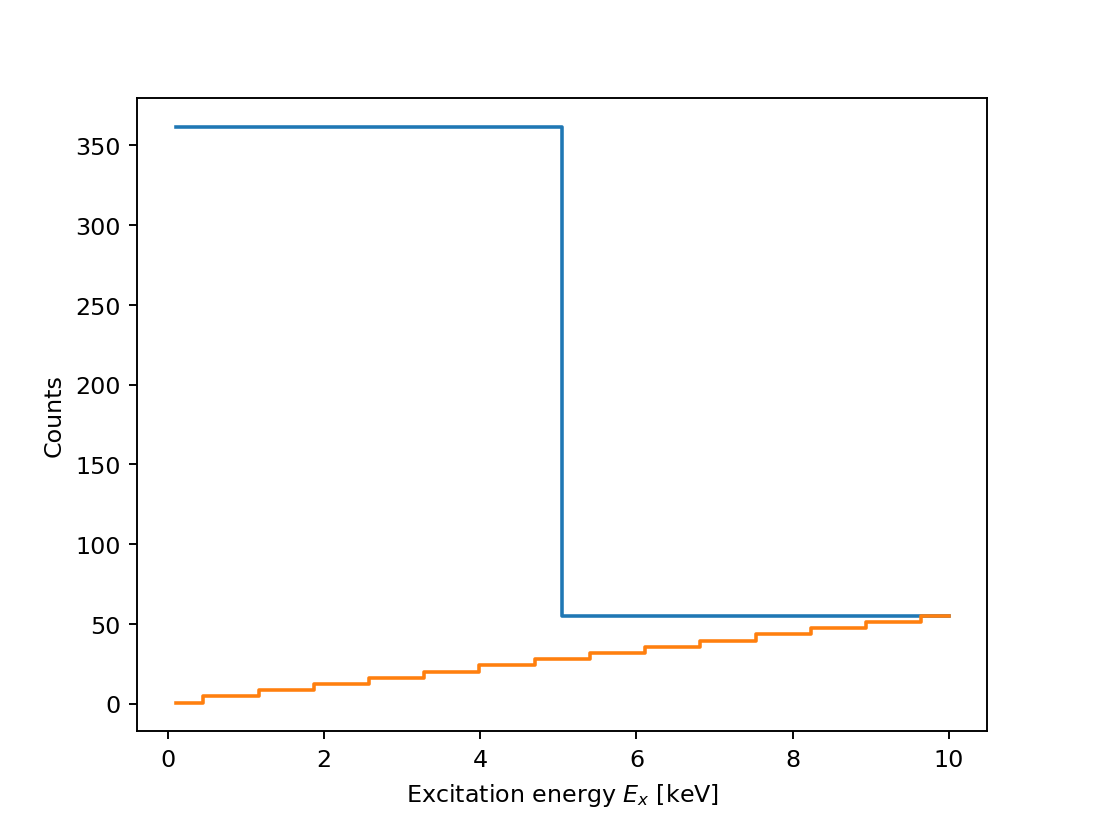

<AxesSubplot: xlabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]', ylabel='Counts'>

In [66]:
ax = mut.plot()
ms.plot(ax=ax)

In [67]:
mut.sum()

416.625

In [68]:
ms.sum()

416.6250000000001

In [69]:
ms.E

array([ 0.1       ,  0.80714286,  1.51428571,  2.22142857,  2.92857143,
        3.63571429,  4.34285714,  5.05      ,  5.75714286,  6.46428571,
        7.17142857,  7.87857143,  8.58571429,  9.29285714, 10.        ])

In [71]:
mut.E

array([ 0.1, 10. ])

In [72]:
mat.